## Readme for Tomer iPython Notebook

## Plots/Data Created:

1. LDA 
2. Semantic Path Length Histogram
3. Mean Semantic Path Length vs. Optimal/Human Path Length
4. LSA Distance that saves "data_with_semantics_all_columns_100d.csv" to task data



In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sn

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD

from sklearn.decomposition import LatentDirichletAllocation

import os 

In [4]:
url = '../data/wikispeedia_paths-and-graph/paths_finished.tsv'
name = ['hashedIpAddress','timestamp','durationInSec','path','rating']
raw_data = pd.read_csv(url,skiprows=15,sep='\t',header=None,names=name)
raw_data.drop(['hashedIpAddress','timestamp'], axis=1, inplace=True)
#drop 

In [5]:
raw_data.head()

,durationInSec,path,rating
0,166,14th_century;15th_century;16th_century;Pacific...,NaN
1,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0
2,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN
3,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN
4,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0


In [6]:
source_cat = []
target_cat = []
len_path = []

for row in raw_data['path']:
    source_cat.append(row.rsplit(';')[0])
    target_cat.append(row.rsplit(';')[-1])
    len_path.append(len(row.rsplit(';')))

raw_data['source_cat'] = source_cat
raw_data['target_cat'] = target_cat
raw_data['len_path'] = len_path

In [7]:
raw_data.head()

,durationInSec,path,rating,source_cat,target_cat,len_path
0,166,14th_century;15th_century;16th_century;Pacific...,NaN,14th_century,African_slave_trade,9
1,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0,14th_century,African_slave_trade,5
2,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN,14th_century,African_slave_trade,8
3,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN,14th_century,Greece,4
4,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0,14th_century,John_F._Kennedy,7


In [9]:
url_complete = []

#creates list of all the urls for each txt file
for file in os.listdir('../data/plaintext_articles/'):
    if 'txt' in file:
        url_complete.append(os.path.join('../data/plaintext_articles/',file))

text_complete = []

#creates a list where each value is a string of the text file of each url (format needed for count vectorizer)
for url in url_complete:
    file = open(url,"r")
    read_file = file.read()
    read_file = read_file.replace("\n"," ")
    read_file = read_file.replace("wikipedia"," ")
    text_complete.append(read_file)
    


In [10]:
url_complete[0:5]
#text_complete[0:5]

['../data/plaintext_articles/%C3%81ed%C3%A1n_mac_Gabr%C3%A1in.txt',
 '../data/plaintext_articles/%C3%85land.txt',
 '../data/plaintext_articles/%C3%89douard_Manet.txt',
 '../data/plaintext_articles/%C3%89ire.txt',
 '../data/plaintext_articles/%C3%93engus_I_of_the_Picts.txt']

## Latent Dirchilet Allocation model
### clustering and topic modeling







In [11]:
#create a bag of word representation

#To-DO
#clean up so there are no numbers or wikipedia

vect = CountVectorizer(stop_words='english', min_df = 5)

#creates an array
X_vec = vect.fit_transform(text_complete)

#creates vocabulary
#print(vect.get_feature_names())


In [12]:
#plotting functions
def plot_important_features(coef, feature_names, top_n=20, ax=None):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(np.abs(coef))[-top_n:]
    important_coefs = coef[inds]
    sort_sign = np.argsort(important_coefs)
    myrange = range(len(inds))
    combined_inds = inds[sort_sign]

    ax.bar(myrange, coef[combined_inds])
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[combined_inds], rotation=60, ha="right")
    
def print_topics(topics, feature_names, components, topics_per_chunk=6,
                 n_words=20):
    sorting = np.argsort(components, axis=1)[:, ::-1]
    for i in range(0, len(topics), topics_per_chunk):
        # for each chunk:
        these_topics = topics[i: i + topics_per_chunk]
        # maybe we have less than topics_per_chunk left
        len_this_chunk = len(these_topics)
        # print topic headers
        print(("topic {:<8}" * len_this_chunk).format(*these_topics))
        print(("-------- {0:<5}" * len_this_chunk).format(""))
        # print top n_words frequent words
        for i in range(n_words):
            try:
                print(("{:<14}" * len_this_chunk).format(
                    *feature_names[sorting[these_topics, i]]))
            except:
                pass
        print("\n")

In [13]:
#create LDA model
lda = LatentDirichletAllocation(n_topics=15, learning_method="batch",
                                random_state=0)
X_lda = lda.fit_transform(X_vec)

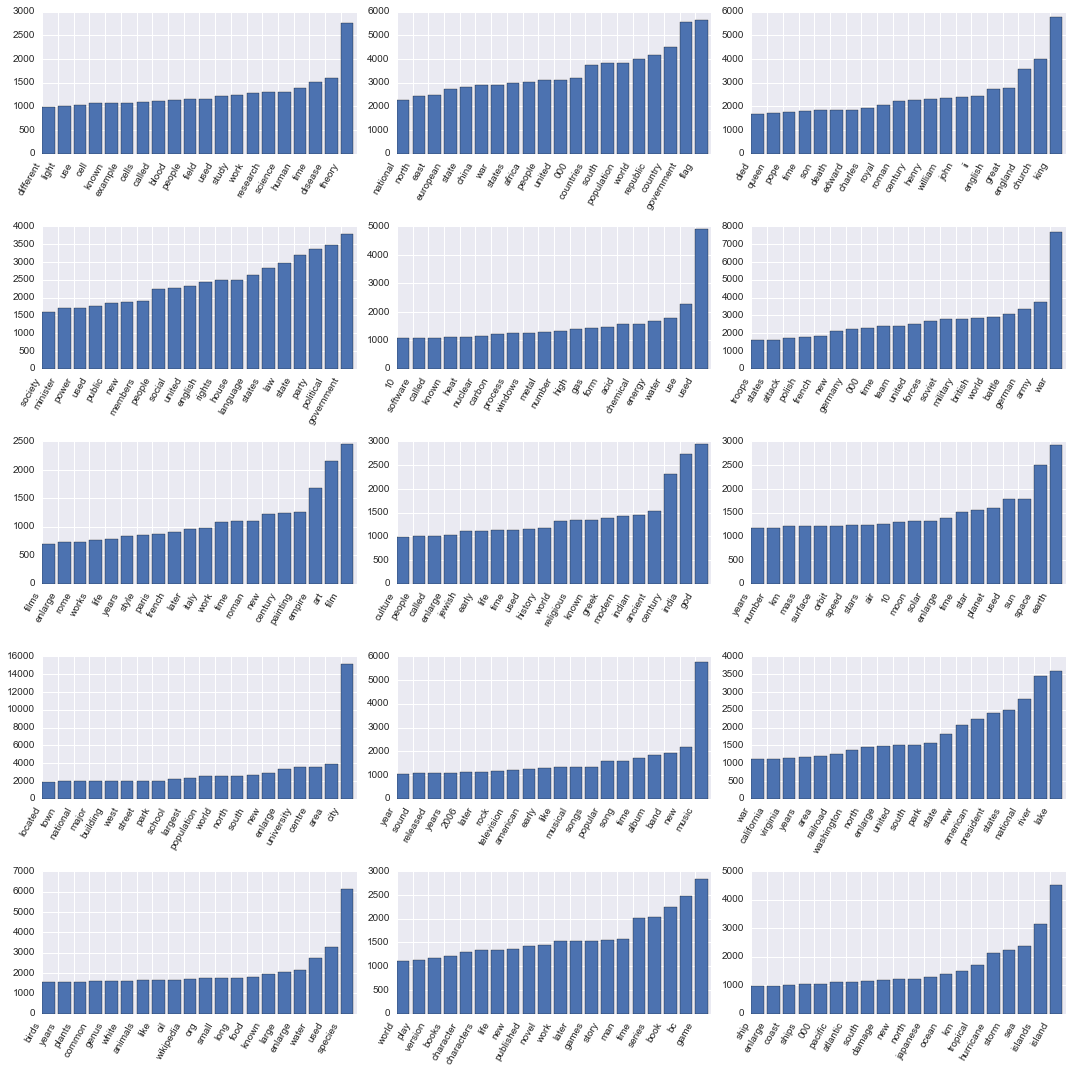

In [16]:
#graph out most important words for each topic
n_components = 15
feature_names = np.array(vect.get_feature_names())
fig, axes = plt.subplots(n_components // 3, 3, figsize=(15, 15))


for ax, coef in zip(axes.ravel(), lda.components_):
    plot_important_features(coef, feature_names, top_n=20, ax=ax)
    
plt.tight_layout()

plt.savefig("../plots/lda_results.png")



In [17]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()
    
n_top_words = 20
feature_names = vect.get_feature_names()

print_top_words(lda, feature_names, n_top_words)


Topic #0:
theory disease time human science research work study used field people blood called cells example known cell use light different
Topic #1:
flag government country republic world population south countries 000 united people africa states war china state european east north national
Topic #2:
king church england great english ii john william henry century roman royal charles edward death son time pope queen died
Topic #3:
government political party state law states language house rights english united social people members new public used power minister society
Topic #4:
used use water energy chemical acid form gas high number metal windows process carbon nuclear heat known called software 10
Topic #5:
war army german battle world british military soviet forces united team time 000 germany new french polish attack states troops
Topic #6:
film art empire painting century new roman time work italy later french paris style years life works rome enlarge films
Topic #7:
god india c

In [19]:
##see actual top level categories 

url_cat = '../data/wikispeedia_paths-and-graph/categories.tsv'
data_cat = pd.read_csv(url_cat,skiprows=12,sep='\t',header=None,names=['text','subject'])

data_subject = data_cat['subject'].str.split('.', expand=True)

full_data = pd.concat([data_cat,data_subject], axis=1)

full_data.head()



,text,subject,0,1,2,3
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.History.British_History.British_Histor...,subject,History,British_History,British_History_1500_and_before_including_Roma...
1,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.People.Historical_figures,subject,People,Historical_figures,None
2,%C3%85land,subject.Countries,subject,Countries,None,None
3,%C3%85land,subject.Geography.European_Geography.European_...,subject,Geography,European_Geography,European_Countries
4,%C3%89douard_Manet,subject.People.Artists,subject,People,Artists,None


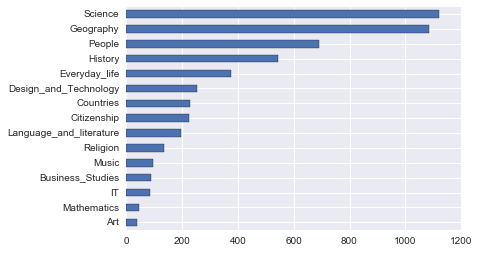

In [22]:
#histogram of categories
full_data[1].value_counts(ascending=True).plot('barh')


In [23]:
url_complete = []

#creates list of all the urls for each txt file
for file in os.listdir('../data/plaintext_articles/'):        
    if 'txt' in file:
        url_complete.append(os.path.join('../data/plaintext_articles/',file))

text_complete = []

#creates a list where each value is a string of the text file of each url (format needed for count vectorizer)
for url in url_complete:
    file = open(url,"r")
    read_file = file.read()
    read_file = read_file.replace("\n"," ")
    read_file = read_file.replace("wikipedia"," ")
    text_complete.append(read_file)
 
#create a list of article names
article_names =[]

for i in url_complete:
    article_names.append(i[:-4].rsplit('/')[-1])
    
def create_lsa_matrix(text_complete,article_names):     
    vectorizer = CountVectorizer(min_df = 1, stop_words = 'english')
    dtm = vectorizer.fit_transform(text_complete)
    lsa = TruncatedSVD(100, algorithm = "arpack")
    dtm_lsa = lsa.fit_transform(dtm)
    dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)
    similarity = np.asarray(np.asmatrix(dtm_lsa) * np.asmatrix(dtm_lsa).T)
    similarity_matrix = pd.DataFrame(similarity,index=article_names, columns=article_names)
    return(similarity_matrix)

In [24]:
similarity_matrix = create_lsa_matrix(text_complete,article_names)

In [25]:
similarity_matrix.head()

,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,%C3%85land,%C3%89douard_Manet,%C3%89ire,%C3%93engus_I_of_the_Picts,%E2%82%AC2_commemorative_coins,10th_century,11th_century,12th_century,13th_century,...,Zimbabwe,Zinc,Zinc_chloride,Zion_National_Park,Zionism,Zirconium,Zoroaster,Zuid-Gelders,Zulu,ZX_Spectrum
%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,1.000000,0.230876,0.307840,0.612345,0.918589,0.180407,0.463066,0.279409,0.332717,0.444135,...,0.210507,0.176323,0.159476,0.264986,0.126887,0.174947,0.544565,0.129422,0.397121,0.186185
%C3%85land,0.230876,1.000000,0.232039,0.294284,0.274830,0.387129,0.254711,0.116622,0.102700,0.259510,...,0.527607,0.141716,0.169269,0.249298,0.212369,0.185003,0.291251,0.420349,0.448285,0.217420
%C3%89douard_Manet,0.307840,0.232039,1.000000,0.138400,0.337156,0.229846,0.385264,0.177235,0.213152,0.338730,...,0.273323,0.219034,0.185137,0.310632,0.172607,0.229376,0.522760,0.241127,0.330971,0.285922
%C3%89ire,0.612345,0.294284,0.138400,1.000000,0.538139,0.229686,0.188629,0.090270,0.143016,0.143212,...,0.337338,0.176919,0.153874,0.066815,0.161982,0.181161,0.230906,0.122458,0.280258,0.179630
%C3%93engus_I_of_the_Picts,0.918589,0.274830,0.337156,0.538139,1.000000,0.202422,0.535533,0.293312,0.354706,0.418945,...,0.241394,0.152826,0.137225,0.293990,0.155642,0.166017,0.513731,0.111146,0.414484,0.219940


In [26]:
url_final = '../data/task-data/data_with_optimal.csv'
final_data = pd.read_csv(url_final)
final_data.head()

,Unnamed: 0,hashedIpAddress,timestamp,durationInSec,path,rating,pathlength,source,target,source_target,opt_path_length,state2,state3,opt2path_length,opt3path_length
0,0,6a3701d319fc3754,1297740409,166,"['14th_century', '15th_century', '16th_century...",NaN,9,14th_century,African_slave_trade,14th_century|African_slave_trade,3.0,15th_century,16th_century,3.0,3.0
1,1,3824310e536af032,1344753412,88,"['14th_century', 'Europe', 'Africa', 'Atlantic...",3.0,5,14th_century,African_slave_trade,14th_century|African_slave_trade,3.0,Europe,Africa,3.0,2.0
2,2,415612e93584d30e,1349298640,138,"['14th_century', 'Niger', 'Nigeria', 'British_...",NaN,8,14th_century,African_slave_trade,14th_century|African_slave_trade,3.0,Niger,Nigeria,3.0,2.0
3,3,64dd5cd342e3780c,1265613925,37,"['14th_century', 'Renaissance', 'Ancient_Greec...",NaN,4,14th_century,Greece,14th_century|Greece,2.0,Renaissance,Ancient_Greece,2.0,1.0
4,4,015245d773376aab,1366730828,175,"['14th_century', 'Italy', 'Roman_Catholic_Chur...",3.0,7,14th_century,John_F._Kennedy,14th_century|John_F._Kennedy,3.0,Italy,Roman_Catholic_Church,2.0,2.0


In [27]:
def getSemanticDist(source, target, data):
    return data.loc[source, target]

def rowFunction(row, data=None):
    if data is not None:
        return getSemanticDist(row['source'], row['target'], data)
    
final_data['semantic_length'] = final_data.apply(rowFunction,data=similarity_matrix,axis=1)

In [28]:
final_data.head()

,Unnamed: 0,hashedIpAddress,timestamp,durationInSec,path,rating,pathlength,source,target,source_target,opt_path_length,state2,state3,opt2path_length,opt3path_length,semantic_length
0,0,6a3701d319fc3754,1297740409,166,"['14th_century', '15th_century', '16th_century...",NaN,9,14th_century,African_slave_trade,14th_century|African_slave_trade,3.0,15th_century,16th_century,3.0,3.0,0.396819
1,1,3824310e536af032,1344753412,88,"['14th_century', 'Europe', 'Africa', 'Atlantic...",3.0,5,14th_century,African_slave_trade,14th_century|African_slave_trade,3.0,Europe,Africa,3.0,2.0,0.396819
2,2,415612e93584d30e,1349298640,138,"['14th_century', 'Niger', 'Nigeria', 'British_...",NaN,8,14th_century,African_slave_trade,14th_century|African_slave_trade,3.0,Niger,Nigeria,3.0,2.0,0.396819
3,3,64dd5cd342e3780c,1265613925,37,"['14th_century', 'Renaissance', 'Ancient_Greec...",NaN,4,14th_century,Greece,14th_century|Greece,2.0,Renaissance,Ancient_Greece,2.0,1.0,0.447861
4,4,015245d773376aab,1366730828,175,"['14th_century', 'Italy', 'Roman_Catholic_Chur...",3.0,7,14th_century,John_F._Kennedy,14th_century|John_F._Kennedy,3.0,Italy,Roman_Catholic_Church,2.0,2.0,0.274103


In [ ]:
#final_data.to_csv("../data/task-data/data_with_semantics_all_columns_100d.csv")

In [30]:
new_data = pd.read_csv("../data/task-data/data_with_semantics_all_columns_100d.csv")


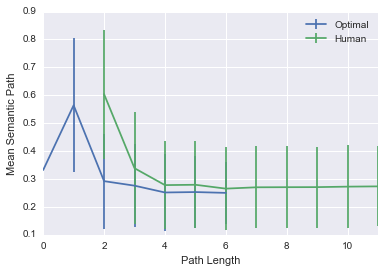

In [36]:
fig, ax = plt.subplots()

new_data.groupby(['opt_path_length']).mean()['semantic_length'].plot(label='Optimal',yerr=new_data.groupby(['opt_path_length']).std()['semantic_length'])

new_data.groupby(['pathlength']).mean()['semantic_length'][0:10].plot(label='Human',yerr= new_data.groupby(['pathlength']).std()['semantic_length'][0:10])
handles, labels = ax.get_legend_handles_labels()

ax.legend(handles, labels)
ax.set_xlabel('Path Length')
ax.set_ylabel('Mean Semantic Path')
plt.show()

plt.savefig('../plots/meansemlength_vs_pathlength.png')


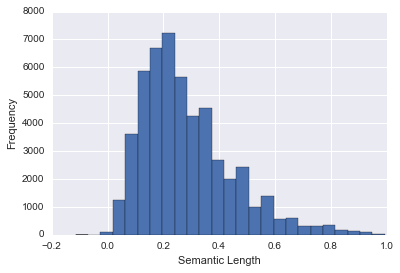

In [39]:
fig,ax = plt.subplots()

new_data['semantic_length'].hist(bins=25)

ax.set_xlabel('Semantic Length')
ax.set_ylabel('Frequency')

plt.savefig('../plots/sem_hist.png')